# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
print("the current working directory is: ", os.getcwd())

the current working directory is:  /Users/raz/atlarge/opendc/experiments/experiment-5-accuracy-evaluation/outputs


# Obtain simulation results

In [3]:
simulation_results_sqrt   = pd.read_parquet("./raw-output/0/seed=0/host.parquet")
simulation_results_linear = pd.read_parquet("./raw-output/1/seed=0/host.parquet")
simulation_results_square = pd.read_parquet("./raw-output/2/seed=0/host.parquet")
simulation_results_cubic  = pd.read_parquet("./raw-output/3/seed=0/host.parquet") 
ground_truth = pd.read_parquet("../inputs/surf-sara/trace/ground_truth.parquet")

# Parse data

In [13]:
power_draw_simulation_sqrt = simulation_results_sqrt.select_dtypes(include=[np.number]).groupby('timestamp')['power_draw'].sum().values
power_draw_simulation_linear = simulation_results_linear.select_dtypes(include=[np.number]).groupby('timestamp')['power_draw'].sum().values
power_draw_simulation_square = simulation_results_square.select_dtypes(include=[np.number]).groupby('timestamp')['power_draw'].sum().values
power_draw_simulation_cubic = simulation_results_cubic.select_dtypes(include=[np.number]).groupby('timestamp')['power_draw'].sum().values

power_draw_truth = ground_truth.groupby('timestamp')['surfsara_power_usage'].sum().values
max_length = min(len(power_draw_simulation_sqrt), len(power_draw_simulation_linear), len(power_draw_simulation_square), len(power_draw_simulation_cubic), len(power_draw_truth))

power_draw_simulation_sqrt = power_draw_simulation_sqrt[:max_length]
power_draw_simulation_linear = power_draw_simulation_linear[:max_length]
power_draw_simulation_square = power_draw_simulation_square[:max_length]
power_draw_simulation_cubic = power_draw_simulation_cubic[:max_length]
power_draw_truth = power_draw_truth[:max_length]

In [14]:
power_draw_simulation_sqrt

array([21970.93859703, 21195.64526799, 21264.39770375, ...,
       19596.16741505, 19629.94410126, 19676.80481096])

# Plotting

plt.figure(figsize=(10, 5))
plt.plot(power_draw_simulation, label="simulation")
plt.plot(power_draw_truth, label="ground truth")

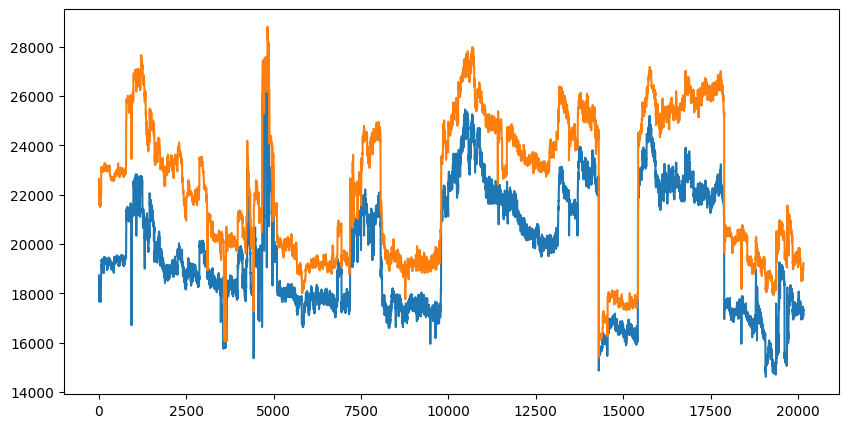

In [15]:
plt.figure(figsize=(10, 5))
# plt.plot(power_draw_simulation_sqrt, label="simulation")
# plt.plot(power_draw_simulation_linear, label="ground truth")
# plt.plot(power_draw_simulation_square, label="simulation")
plt.plot(power_draw_simulation_cubic, label="ground truth")
plt.plot(power_draw_truth, label="ground truth")


# Accuracy

A data sample is accurate, if the difference between the simulation and the ground truth is less than 10% of the ground truth value. The accuracy is measure in percentage.

In [9]:
accuracy_sqrt = np.abs(power_draw_simulation_sqrt - power_draw_truth) < 0.1 * power_draw_truth
accuracy_percentage_sqrt = np.sum(accuracy_sqrt) / len(accuracy_sqrt) * 100
print("The accuracy of the sqrt model is: ", accuracy_percentage_sqrt, "%")

The accuracy of the sqrt model is:  98.6854506671958 %


In [10]:
accuracy_linear = np.abs(power_draw_simulation_linear - power_draw_truth) < 0.1 * power_draw_truth
accuracy_percentage_linear = np.sum(accuracy_linear) / len(accuracy_linear) * 100
print("The accuracy of the linear model is: ", accuracy_percentage_linear, "%")

The accuracy of the linear model is:  97.56436331167221 %


In [11]:
accuracy_square = np.abs(power_draw_simulation_square - power_draw_truth) < 0.1 * power_draw_truth
accuracy_percentage_square = np.sum(accuracy_square) / len(accuracy_square) * 100
print("The accuracy of the square model is: ", accuracy_percentage_square, "%")

The accuracy of the square model is:  65.2462919787688 %


In [12]:
accuracy_cubic = np.abs(power_draw_simulation_cubic - power_draw_truth) < 0.1 * power_draw_truth
accuracy_percentage_cubic = np.sum(accuracy_cubic) / len(accuracy_cubic) * 100
print("The accuracy of the cubic model is: ", accuracy_percentage_cubic, "%")

The accuracy of the cubic model is:  39.83828562924748 %
